In [1]:
import tensorflow as tf
import numpy as np

/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pedro/minicon

In [2]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

training_images = training_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [3]:
layers = [
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)]

model = tf.keras.models.Sequential(layers)

model.compile(optimizer=tf.train.AdamOptimizer(), loss=tf.keras.losses.sparse_categorical_crossentropy)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [5]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.4388
Epoch 2/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.2944
Epoch 3/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.2486
Epoch 4/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.2172
Epoch 5/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.1912


In [6]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 180us/step


0.24399244496822356

# Visualizing the Convolutions and Pooling

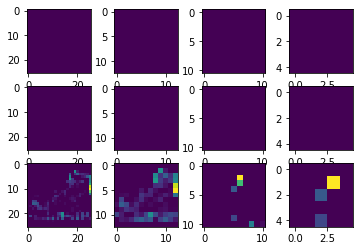

In [24]:
import matplotlib.pyplot as plt

# shoes
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28

CONVOLUTION_NUMBER = 2

layer_activations = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_activations)

fig, ax = plt.subplots(nrows=3, ncols=4)

for layer_num in range(0, 4):
    activation = activation_model.predict(test_images[FIRST_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[0, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[0, layer_num].grid(False)
    activation = activation_model.predict(test_images[SECOND_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[1, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[1, layer_num].grid(False)
    activation = activation_model.predict(test_images[THIRD_IMAGE][np.newaxis, :, :, :])[layer_num]
    ax[2, layer_num].imshow(activation[0, :, :, CONVOLUTION_NUMBER])
    ax[2, layer_num].grid(False)

/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


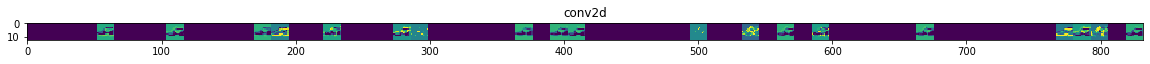

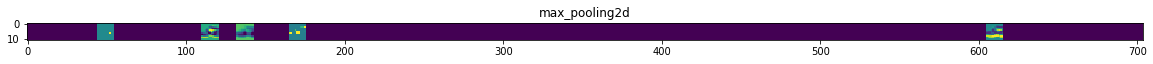

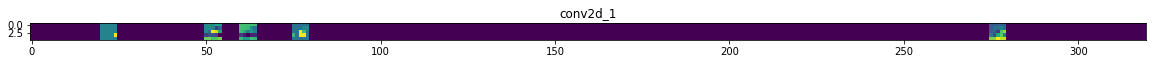

In [15]:
import matplotlib.pyplot as plt

# shoes
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28

CONVOLUTION_NUMBER = 2

x = test_images[SECOND_IMAGE]    # Numpy array with shape (28, 28, 1)
x = x.reshape((1,) + x.shape)    # Numpy array with shape (1, 28, 28, 1)
x /= 255    # Rescale by 1/255

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

Well Done